In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [2]:
os.chdir(r'C:\Users\user\Downloads\image_classifier\training_set')
training_path=os.getcwd()
os.chdir(r'C:\Users\user\Downloads\image_classifier\test_set')
test_path=os.getcwd()
print(training_path)
print(test_path)

C:\Users\user\Downloads\image_classifier\training_set
C:\Users\user\Downloads\image_classifier\test_set


In [3]:
print(os.listdir(training_path))

['cats', 'dogs']


In [4]:
cats_img_path=os.path.join(training_path,'cats')
dogs_img_path=os.path.join(training_path,'dogs')

In [5]:
cats_img=os.listdir(cats_img_path)
dogs_img=os.listdir(dogs_img_path)
print(cats_img[:10])
print(dogs_img[:10])
print("no of cats images"+str(len(cats_img)))
print("no of dogs images"+str(len(dogs_img)))

['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg']
['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']
no of cats images4001
no of dogs images4006


In [21]:
train_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(training_path,target_size=(100,100),batch_size=128,class_mode='binary')
test_datagen=ImageDataGenerator(rescale=1/255)
test_generator=test_datagen.flow_from_directory(test_path,target_size=(100,100),batch_size=128,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [22]:
img,labels=next(train_generator)
print(train_generator.class_indices)


{'cats': 0, 'dogs': 1}


[0. 0.]


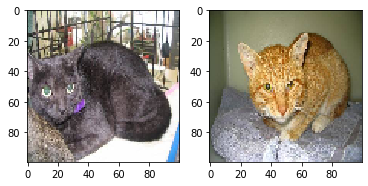

In [23]:
fig,axes=plt.subplots(1,2)
axes[0].imshow(img[0])
axes[1].imshow(img[1])
print(labels[:2])


In [24]:
model=tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  
    
    
    
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4333696   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [26]:
from tensorflow.keras.optimizers import RMSprop

In [27]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
his=model.fit_generator(train_generator,steps_per_epoch=63,epochs=5,validation_data=test_generator,validation_steps=16)

Epoch 1/5
63/63 [==============================] - 51s 810ms/step - loss: 0.8458 - acc: 0.5760 - val_loss: 0.6102 - val_acc: 0.6871
Epoch 2/5
63/63 [==============================] - 51s 812ms/step - loss: 0.6266 - acc: 0.6721 - val_loss: 0.5509 - val_acc: 0.7321
Epoch 3/5
63/63 [==============================] - 49s 780ms/step - loss: 0.5504 - acc: 0.7258 - val_loss: 0.5193 - val_acc: 0.7459
Epoch 4/5
63/63 [==============================] - 51s 815ms/step - loss: 0.4915 - acc: 0.7587 - val_loss: 0.5006 - val_acc: 0.7514
Epoch 5/5
63/63 [==============================] - 55s 879ms/step - loss: 0.4468 - acc: 0.7928 - val_loss: 0.5253 - val_acc: 0.7509


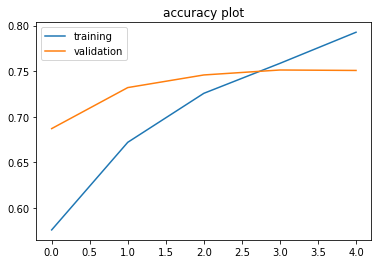

In [29]:
plt.plot(his.history['acc'])
plt.plot(his.history['val_acc'])
plt.title("accuracy plot")
plt.legend(['training','validation'])

In [33]:
os.chdir(r'C:\\Users\\user\\Downloads\\image_classifier\\test_set\cats')

In [32]:
model.save('dog_cat_classifier001.h5')

In [35]:
cats_file=os.listdir()

In [37]:
from keras.preprocessing import image
result=[]
for name in cats_file:
    test_image=image.load_img(name,target_size=(100,100))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    
    result.append(model.predict(test_image))

Using TensorFlow backend.


In [38]:
result=np.array(result)
print(result.shape)

(1011, 1, 1)


In [39]:
result=result.reshape(1011,1)

In [40]:
os.getcwd()

'C:\\Users\\user\\Downloads\\image_classifier\\test_set\\cats'

In [ ]:
# testing our CNN model

In [73]:
os.chdir(r'C:\\Users\\user\\Downloads')

# model testing on Images from the web

above image is of a dog


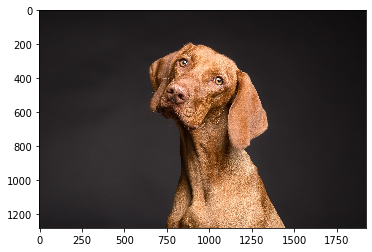

In [76]:

test_image=image.load_img("dog.jpg",target_size=(100,100))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
pi=mpimg.imread("dog.jpg")
plt.imshow(pi)
y=model.predict(test_image)
if(y==0):
    print("Below image is of a cat")
else:
    print("Below image is of a dog")

above image is of a dog


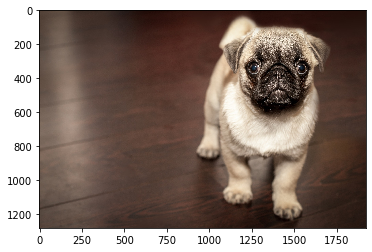

In [77]:
test_image=image.load_img("puppy.jpg",target_size=(100,100))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
pi=mpimg.imread("puppy.jpg")
plt.imshow(pi)
y=model.predict(test_image)
if(y==0):
    print("Below image is of a cat")
else:
    print("Below image is of a dog")

above image is of a cat


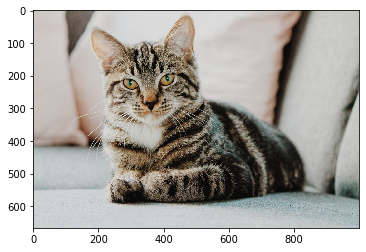

In [78]:
test_image=image.load_img("cat.jpg",target_size=(100,100))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
pi=mpimg.imread("cat.jpg")
plt.imshow(pi)
y=model.predict(test_image)
if(y==0):
    print("Below image is of a cat")
else:
    print("Below image is of a dog")